In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
import phate
import torch

# Visualization of latent space

In [1]:
with open('../latent_embeddings1fd3.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_rep = pk.load(file)

with open('../times_1fd3.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

In [2]:
z_rep = torch.cat(z_rep, dim=0)

In [3]:
z_rep.shape

torch.Size([1001, 64])

In [4]:
times.shape

(1001,)

Calculating PHATE...
  Running PHATE on 1001 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.02 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 0.87 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.16 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.81 seconds.
Calculated PHATE in 1.88 seconds.


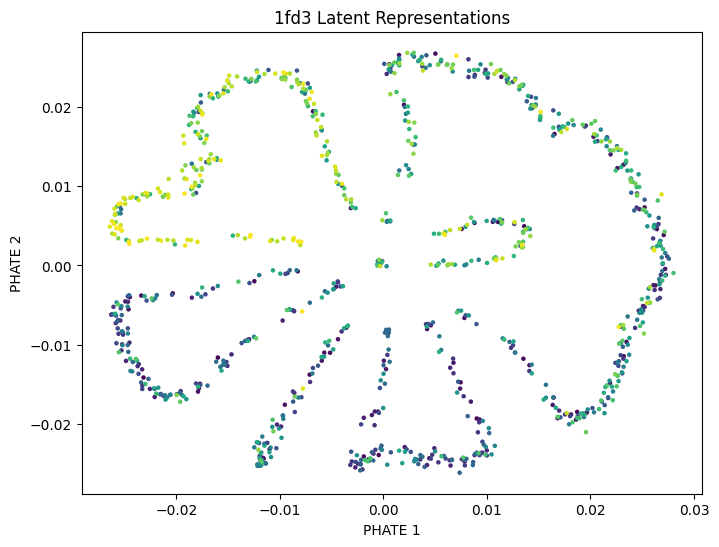

In [5]:
# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(z_rep)

# Visualize the latent representation
plt.figure(figsize=(8, 6))
plt.scatter(z_phate[:, 0], z_phate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('1fd3 Latent Representations')
plt.show()


Calculating TPHATE...
  Running TPHATE on 1001 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Learning the autocorrelation function...
  Calculating Autocorr kernel...
    Dropoff point: 346
  Combining PHATE operator and autocorr operator
  Calculating optimal t...
    Automatically selected t = 4
  Calculated optimal t in 0.27 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.97 seconds.
Calculated TPHATE in 1.77 seconds.


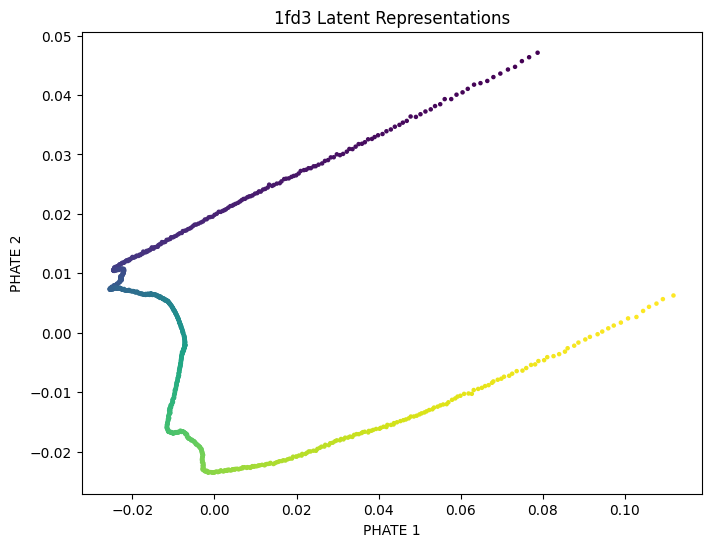

In [6]:
import tphate

tphate_op = tphate.TPHATE(n_components=2)
data_tphate = tphate_op.fit_transform(z_rep)

plt.figure(figsize=(8, 6))
plt.scatter(data_tphate[:, 0], data_tphate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('1fd3 Latent Representations')
plt.show()

# Coordinates Predictions

In [7]:
import pickle as pk
import phate
import torch
import numpy as np
import matplotlib.pyplot as plt
with open('../coords_1fd3.pkl', 'rb') as file: 
    # Load the data from the pickle file
    coords = pk.load(file)

In [8]:
with open('../1fd3_A_analysis/graphsrog.pkl', 'rb') as file:
        full_dataset =  pk.load(file)

for data in full_dataset:
        y = float(data.y)
        data.y = y
    
# import pdb; pdb.set_trace()
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(full_dataset, [train_size, val_size])
test_targets = np.array([data.coords for data in val_set])

In [9]:
test_targets

array([[[2.1225996, 1.2639333, 1.6767554],
        [2.0725684, 1.6621368, 1.9641579],
        [2.0482285, 1.937    , 1.5791429],
        ...,
        [2.4985907, 1.4500273, 2.787709 ],
        [2.6915274, 1.5211908, 3.3693182],
        [3.04792  , 1.3723333, 3.216307 ]],

       [[2.2073336, 1.2513335, 1.6044444],
        [2.0675473, 1.6599894, 1.9038317],
        [1.9839715, 1.8833427, 1.5163715],
        ...,
        [2.4744544, 1.4639908, 2.7889   ],
        [2.557382 , 1.7716908, 3.2647545],
        [2.9321203, 1.4208531, 3.27612  ]],

       [[1.789889 , 1.3304445, 1.614511 ],
        [2.0656419, 1.6171895, 1.9325365],
        [1.9712   , 1.9206572, 1.5453714],
        ...,
        [2.457064 , 1.4897999, 2.8016455],
        [2.8686094, 1.6627364, 3.3021271],
        [2.9769597, 1.1809067, 3.1100664]],

       ...,

       [[2.0149333, 1.1907778, 1.6737334],
        [2.0718844, 1.6176844, 1.9143578],
        [2.0215144, 1.9174287, 1.5478857],
        ...,
        [2.4988635, 1.4708

In [10]:
coords

[tensor([[[1.3946, 0.7086, 1.1499],
          [1.7082, 1.2149, 1.4623],
          [1.5052, 1.2376, 1.3819],
          ...,
          [1.7828, 0.7537, 2.4226],
          [2.0234, 1.3518, 2.7100],
          [2.3900, 0.8741, 2.5697]],
 
         [[1.5621, 0.8456, 1.3135],
          [1.8893, 1.3690, 1.6109],
          [1.6907, 1.3616, 1.5108],
          ...,
          [2.0087, 0.8593, 2.6650],
          [2.2770, 1.5251, 2.9952],
          [2.6452, 1.0228, 2.8408]],
 
         [[2.2368, 1.4306, 1.9797],
          [2.6207, 2.0151, 2.2101],
          [2.4262, 1.8667, 2.0157],
          ...,
          [2.9344, 1.3058, 3.6116],
          [3.3255, 2.2429, 4.1361],
          [3.6680, 1.6523, 3.9227]],
 
         ...,
 
         [[1.9011, 1.1477, 1.6544],
          [2.2674, 1.6962, 1.9095],
          [2.0636, 1.6129, 1.7605],
          ...,
          [2.4737, 1.0889, 3.1564],
          [2.8166, 1.8850, 3.5770],
          [3.1815, 1.3367, 3.4089]],
 
         [[1.9248, 1.1661, 1.6748],
          [2

In [11]:
coords = torch.cat(coords, dim=0)

In [12]:
coords.shape

torch.Size([201, 41, 3])

In [13]:
test_targets.shape

(201, 41, 3)

In [14]:
def calculate_pearson_correlation(X, Y):
    """
    Calculate the Pearson correlation coefficient separately for each dimension (X, Y, Z) across all graphs in the test set.

    Args:
        X: numpy array of shape (N, M, D), where N is the number of graphs, M is the number of residues/nodes,
           and D is the number of dimensions containing predicted coordinates.
        Y: numpy array of shape (N, M, D), where N is the number of graphs, M is the number of residues/nodes,
           and D is the number of dimensions containing ground truth coordinates.

    Returns:
        pearson_corr: numpy array of shape (D,) containing the Pearson correlation coefficient for each dimension.
    """
    N, M, D = X.shape
    pearson_corr = np.zeros(D)

    for d in range(D):
        X_d = X[:, :, d].flatten()
        Y_d = Y[:, :, d].flatten()
        pearson_corr[d] = np.corrcoef(X_d, Y_d)[0, 1]

    return pearson_corr


In [15]:
pearson_corr = calculate_pearson_correlation(coords, test_targets)
print("Pearson Correlation Coefficient:", pearson_corr)


Pearson Correlation Coefficient: [0.74560683 0.68012754 0.7665351 ]


/tmp/ipykernel_2635676/3998286275.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


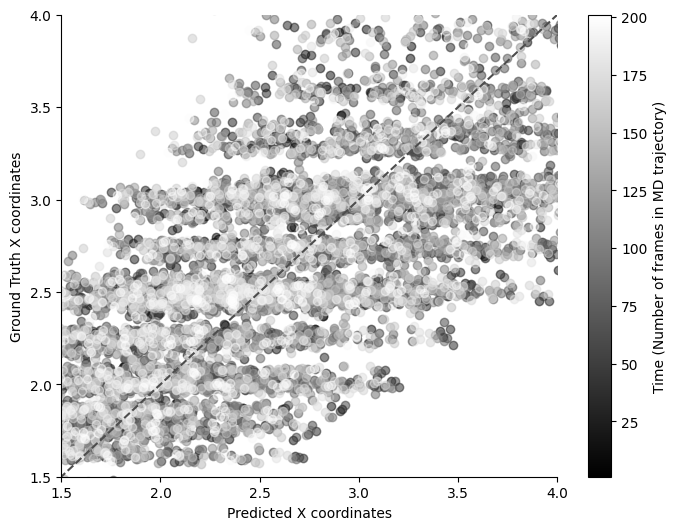

In [16]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 0], y=test_targets[i, :, 0], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted X coordinates")
plt.ylabel("Ground Truth X coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


/tmp/ipykernel_2635676/2051250930.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


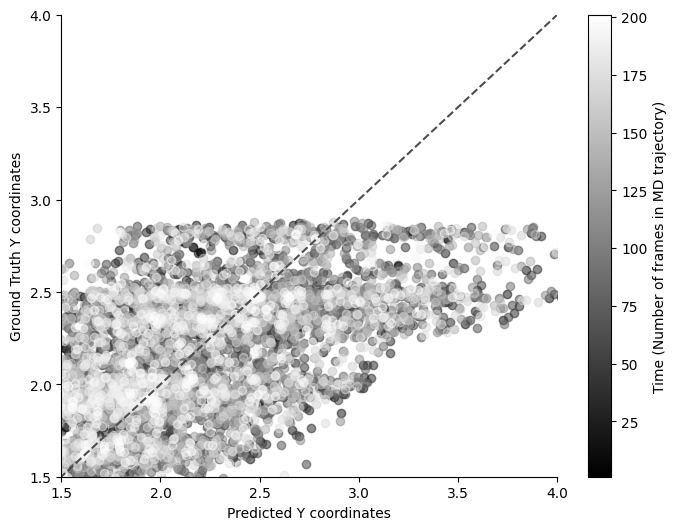

In [17]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 1], y=test_targets[i, :, 1], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted Y coordinates")
plt.ylabel("Ground Truth Y coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


/tmp/ipykernel_2635676/2418739173.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')


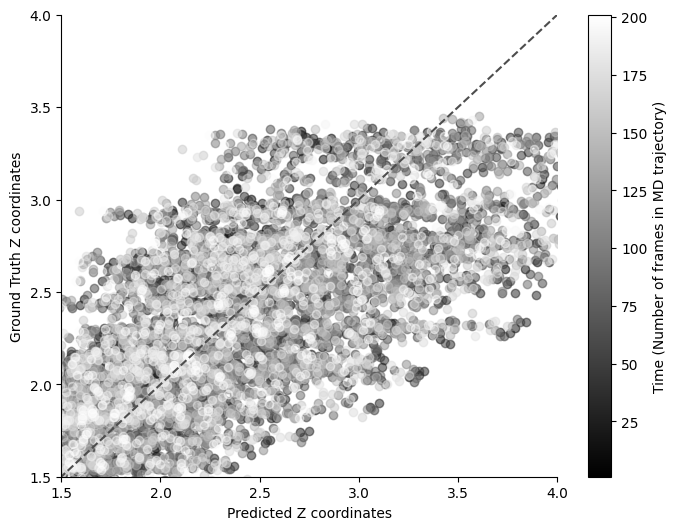

In [18]:


# Assuming ground truth and predicted X coordinates are stored in variables gt_x_coords and pred_x_coords respectively

plt.figure(figsize=(8, 6))

# Define colormap
cmap = plt.cm.gray(np.linspace(0, 1, 201))

# Loop over all graphs
for i in range(201):
    # Plot each graph with a different grayscale color
    plt.scatter(x=coords[i, :, 2], y=test_targets[i, :, 2], color=cmap[i], alpha=0.5, label=f'Graph {i+1}')

# Plot diagonal line for reference
plt.plot([-10, 20], [-10, 20], ls="--", c=".3")

# Set plot limits and labels
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.xlabel("Predicted Z coordinates")
plt.ylabel("Ground Truth Z coordinates")
# plt.title("Comparison of Ground Truth and Predicted X Coordinates")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add legend
# plt.legend()
# Add colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=plt.Normalize(vmin=1, vmax=201))
sm.set_array([])
plt.colorbar(sm, label='Time (Number of frames in MD trajectory)')

# Show plot
plt.show()


# Attention Maps

In [3]:
with open('../attention_maps_1bx7.pkl', 'rb') as file:
    # Load the data from the pickle file
    row_attn = pk.load(file)

In [7]:
row_attn[15][0].shape

torch.Size([41, 1, 55, 55])

torch.Size([1001, 60, 60])
tensor([4.1847e-20, 4.6254e-20, 3.4743e-22, 8.3164e-23, 5.2083e-23, 4.5550e-22,
        7.6797e-22, 1.4793e-20, 3.1812e-20, 4.6549e-21, 2.3437e-20, 3.2914e-20,
        1.5032e-20, 3.1830e-20, 4.4821e-20, 5.9434e-20, 2.7988e-21, 1.6244e-20,
        7.8771e-20, 1.4751e-19, 1.7998e-19, 5.0185e-20, 1.5641e-21, 2.0392e-22,
        4.5117e-22, 6.8518e-22, 4.8785e-21, 4.8143e-21, 1.6739e-21, 2.0999e-21,
        1.1552e-20, 4.0582e-19, 8.7202e-18, 3.2114e-17, 4.0744e-17, 3.3422e-16,
        8.7137e-16, 6.1402e-14, 2.4531e-12, 4.6310e-11, 5.3215e-10, 9.5839e-10,
        4.6871e-08, 6.0553e-06, 5.5093e-03, 6.1538e-01, 4.5116e-01, 1.4738e-03,
        8.6374e-07, 6.1284e-09, 1.2494e-11, 7.7122e-13, 2.8734e-14, 3.3456e-15,
        4.4762e-17, 4.5547e-17, 3.0319e-17, 1.2101e-16, 1.6212e-16, 2.0110e-16])
Max vector saved to max_vector_1bxy.csv


<Axes: >

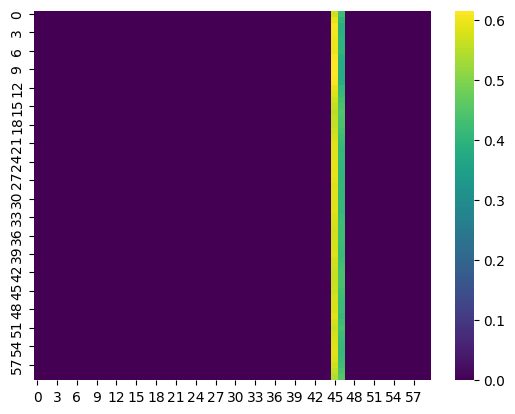

In [6]:
import pickle as pk
import seaborn as sns
import torch
import pickle as pk
import seaborn as sns

# Load the data from the pickle file
with open('../attention_maps_1bxy.pkl', 'rb') as file:
    row_attn = pk.load(file)

row_attn_tensor = row_attn[0][0]
# Get the shape of the attention maps
row_attn_shape = row_attn_tensor.shape

# Create an empty tensor
result_tensor = torch.empty((0,) + row_attn_shape[1:], dtype=row_attn_tensor.dtype)

# Iterate over the range and add row_attn[i][0] to the result_tensor
for i in range(16):
    result_tensor = torch.cat((result_tensor, row_attn[i][0]))

result_tensor = result_tensor.squeeze(1)
# Print the result_tensor
print(result_tensor.shape)

result_tensor = torch.mean(result_tensor, dim=0)

max_vector = torch.max(result_tensor, dim=0)[0]
print(max_vector)
import csv

# Define the file path
file_path = 'max_vector_1bxy.csv'

# Define the data to be saved
data = [(i+1, score.item()) for i, score in enumerate(max_vector)]

# Save the data to the CSV file
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Residue Number', 'Attention Score'])
    writer.writerows(data)

print(f"Max vector saved to {file_path}")
# Calculate the mean attention map
# attention_maps = [i[0].mean(dim=0) for i in result_tensor]

# Plot the first attention map
sns.heatmap(result_tensor, cmap='viridis')


# PyMol Visualization

In [3]:
import pymol
from pymol import cmd

# Load your protein structure into PyMOL
cmd.fetch("your_protein_pdb_id")

# Retrieve residue attention scores (Replace this with your actual code to fetch scores)
# Example: residue_scores = {"1A": 0.8, "2B": 0.6, ...}

# Define a color gradient for visualization
def color_gradient(score):
    # Define your color scheme based on attention scores
    if score >= 0.8:
        return "red"
    elif score >= 0.6:
        return "orange"
    elif score >= 0.4:
        return "yellow"
    elif score >= 0.2:
        return "green"
    else:
        return "blue"

# Apply color scheme to residues based on their attention scores
for residue, score in residue_scores.items():
    color = color_gradient(score)
    cmd.color(color, f"resi {residue}")

# Show the protein structure with the color-coded residues
cmd.show("cartoon")
cmd.zoom()


ModuleNotFoundError: No module named 'pymol'